In [3]:
import ROOT
import uproot 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
BASE_DIR = "/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/UnfoldingHistos_2016preVFP/Nominal/ee/"

In [6]:
Unfolding_histo_fileptr = uproot.open(BASE_DIR + "histosTUnfold_ee_ttbarsignalplustau_fromDilepton_2016ULpreVFP.root")

In [7]:
Unfolding_histo_fileptr.keys()

['hrecoVsgen_ll_cHel;1',
 'hgen_ll_cHel;1',
 'hreco_ll_cHel;1',
 'hresolutionbins_ll_cHel;1',
 'hrecoVsgen_ll_cLab;1',
 'hgen_ll_cLab;1',
 'hreco_ll_cLab;1',
 'hresolutionbins_ll_cLab;1',
 'hrecoVsgen_llbar_delta_phi;1',
 'hgen_llbar_delta_phi;1',
 'hreco_llbar_delta_phi;1',
 'hresolutionbins_llbar_delta_phi;1',
 'hrecoVsgen_llbar_delta_eta;1',
 'hgen_llbar_delta_eta;1',
 'hreco_llbar_delta_eta;1',
 'hresolutionbins_llbar_delta_eta;1',
 'hrecoVsgen_b1k;1',
 'hgen_b1k;1',
 'hreco_b1k;1',
 'hresolutionbins_b1k;1',
 'hrecoVsgen_b2k;1',
 'hgen_b2k;1',
 'hreco_b2k;1',
 'hresolutionbins_b2k;1',
 'hrecoVsgen_b1r;1',
 'hgen_b1r;1',
 'hreco_b1r;1',
 'hresolutionbins_b1r;1',
 'hrecoVsgen_b2r;1',
 'hgen_b2r;1',
 'hreco_b2r;1',
 'hresolutionbins_b2r;1',
 'hrecoVsgen_b1n;1',
 'hgen_b1n;1',
 'hreco_b1n;1',
 'hresolutionbins_b1n;1',
 'hrecoVsgen_b2n;1',
 'hgen_b2n;1',
 'hreco_b2n;1',
 'hresolutionbins_b2n;1',
 'hrecoVsgen_b1j;1',
 'hgen_b1j;1',
 'hreco_b1j;1',
 'hresolutionbins_b1j;1',
 'hrecoVsgen_b

### Project out the axes

In [32]:
Unfolding_histo_fileptr["hrecoVsgen_c_kk"].to_hist()

Hist(
  Regular(6, -1, 1, name='xaxis'),
  Regular(6, -1, 1, name='yaxis'),
  storage=Weight()) # Sum: WeightedSum(value=2.51549e+07, variance=1.72752e+09) (WeightedSum(value=1.20222e+09, variance=8.92009e+10) with flow)

In [33]:
Unfolding_histo_fileptr["hrecoVsgen_c_kk"].to_hist().project('xaxis')

Hist(Regular(6, -1, 1, name='xaxis'), storage=Weight()) # Sum: WeightedSum(value=1.20222e+09, variance=8.92009e+10)

In [34]:
Unfolding_histo_fileptr["hrecoVsgen_c_kk"].to_hist().project('yaxis')

Hist(Regular(6, -1, 1, name='yaxis'), storage=Weight()) # Sum: WeightedSum(value=2.51549e+07, variance=1.72752e+09) (WeightedSum(value=1.20222e+09, variance=8.92009e+10) with flow)

## Compare bin by bin contents

### Gen 

In [35]:
gen_from_projection = Unfolding_histo_fileptr["hrecoVsgen_c_kk"].to_hist().project('xaxis').to_numpy()[0]
gen_from_projection

array([4.67535585e+07, 1.63415346e+08, 4.37261665e+08, 4.04115957e+08,
       1.21858935e+08, 2.88119747e+07])

In [36]:
gen_from_histogram = Unfolding_histo_fileptr["hgen_c_kk"].to_numpy()[0]
gen_from_histogram

array([4.67535585e+07, 1.63415346e+08, 4.37261665e+08, 4.04115957e+08,
       1.21858935e+08, 2.88119747e+07])

In [37]:
gen_from_projection == gen_from_histogram

array([ True,  True, False,  True,  True,  True])

In [38]:
delta_gen = np.divide((gen_from_projection - gen_from_histogram), gen_from_histogram)
delta_gen = abs(delta_gen) * 100
delta_gen 

array([0.00000000e+00, 0.00000000e+00, 1.36313447e-14, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

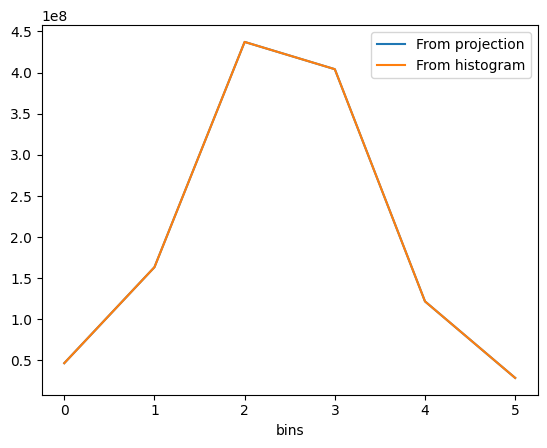

In [39]:
plt.plot(gen_from_projection, label="From projection")
plt.plot(gen_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.94, 1.04)

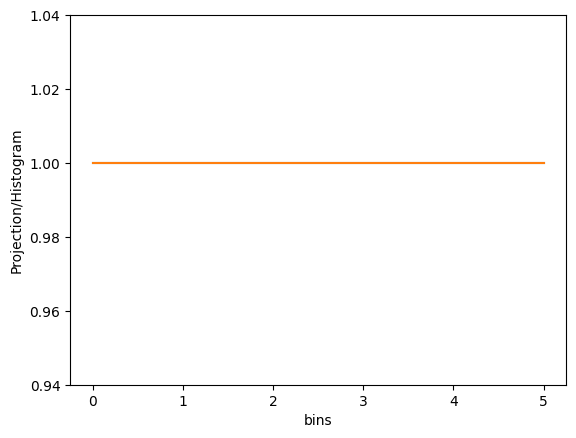

In [40]:
plt.plot(np.divide(gen_from_projection, gen_from_histogram))
plt.plot(np.ones(len(gen_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.94,1.04)

In [15]:
sum(delta_gen)/ len(delta_gen)

2.2871159074108683e-14

### Reco

In [41]:
reco_from_projection = Unfolding_histo_fileptr["hrecoVsgen_c_kk"].to_hist().project('yaxis').to_numpy()[0]
reco_from_projection

array([ 981357.90606117, 3375050.9784584 , 9198018.20064995,
       8446893.62204361, 2524492.17763108,  629039.68923569])

In [42]:
reco_from_histogram = Unfolding_histo_fileptr["hreco_c_kk"].to_numpy()[0]
reco_from_histogram

array([ 981357.90606117, 3375050.9784584 , 9198018.20064995,
       8446893.62204361, 2524492.17763108,  629039.68923569])

In [43]:
reco_from_projection == reco_from_histogram

array([ True,  True,  True,  True,  True,  True])

In [44]:
delta_reco = np.divide((reco_from_projection - reco_from_histogram), reco_from_histogram)
delta_reco = abs(delta_reco) * 100
delta_reco

array([0., 0., 0., 0., 0., 0.])

In [45]:
sum(delta_reco)/ len(delta_reco)

0.0

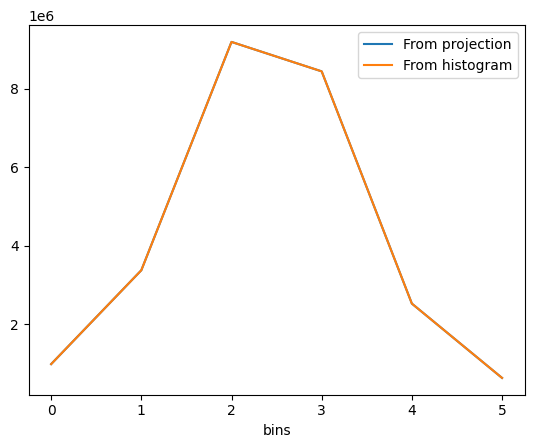

In [46]:
plt.plot(reco_from_projection, label="From projection")
plt.plot(reco_from_histogram , label="From histogram")
plt.xlabel("bins")
plt.legend()

(0.99, 1.01)

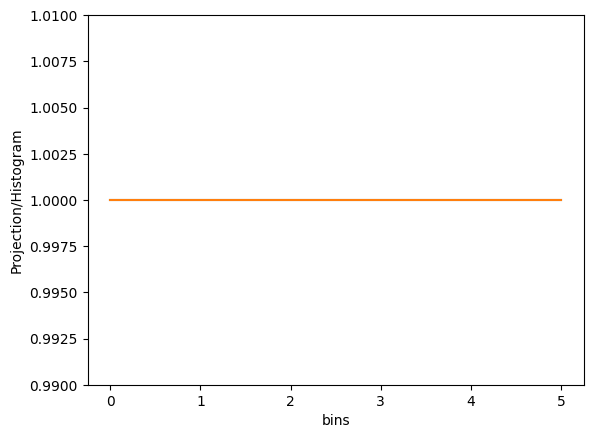

In [47]:
plt.plot(np.divide(reco_from_projection, reco_from_histogram))
plt.plot(np.ones(len(reco_from_projection)))
plt.ylabel("Projection/Histogram")
plt.xlabel("bins")
plt.ylim(0.99,1.01)

In [48]:
RespMat = Unfolding_histo_fileptr["hrecoVsgen_c_kk"].to_hist()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(
/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


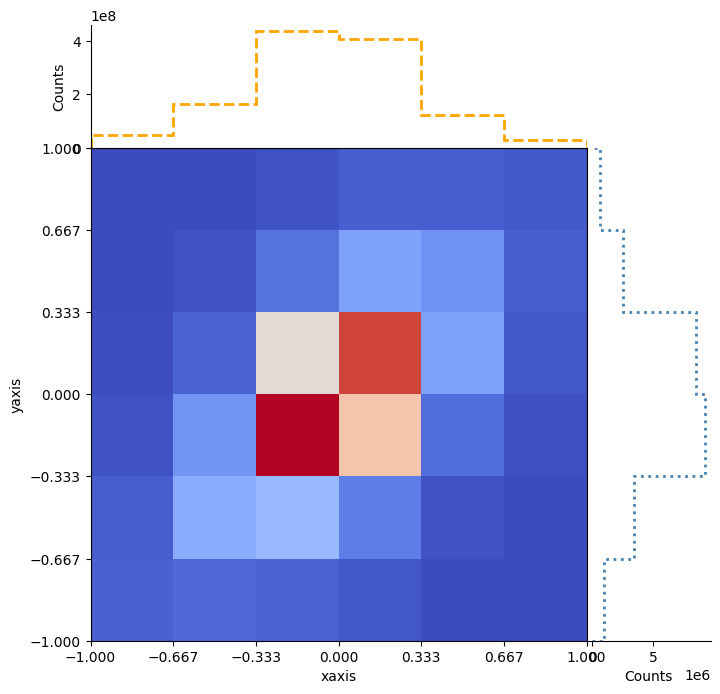

In [49]:
# plot2d_full
plt.figure(figsize=(8, 8))

RespMat.plot2d_full(
    main_cmap="coolwarm",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.show()